In [12]:
import pandas as pd
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import loompy
import numpy_groupies as npg
import cytograph
import os
import sys
current_dir = os.getcwd()
sys.path.append(current_dir)
import scatterm as scatterm_mod

import helper_utils as own_utils
import mplt as mplot
from scipy.spatial import distance

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import numpy_groupies.aggregate_numpy as npg

import re
import scanpy
import seaborn as sns

from matplotlib import rcParams

import matplotlib.pyplot as plt

from scipy.sparse import coo_matrix

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.size"] = 7
transparency = True
ms=0.7
labelspacing=0.3
viridis_grey  = (245/256,245/256,245/256,1)#(239/256, 239/256, 240/256,1)

ofolder = current_dir

In [18]:
ofolder

'/Users/kalee/Library/CloudStorage/OneDrive-KI.SE/Mac/Documents/out/Kim/TH_neurons'

In [3]:
from typing import Optional, Any, List
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from cytograph.plotting import Colorizer 

## plotting function

In [4]:
from typing import Any

import numpy as np
from sklearn.preprocessing import LabelEncoder
color_alphabet = np.array([
	[240, 163, 255], [0, 117, 220], [153, 63, 0], [76, 0, 92], [0, 92, 49], [43, 206, 72], [255, 204, 153], [128, 128, 128], [148, 255, 181], [143, 124, 0], [157, 204, 0], [194, 0, 136], [0, 51, 128], [255, 164, 5], [255, 168, 187], [66, 102, 0], [255, 0, 16], [94, 241, 242], [0, 153, 143], [224, 255, 102], [116, 10, 255], [153, 0, 0], [255, 255, 128], [255, 255, 0], [255, 80, 5]
]) / 256

colors75 = np.concatenate([color_alphabet, 1 - (1 - color_alphabet) / 2, color_alphabet / 2])


def colorize(x: np.ndarray, *, bgval: Any = None) -> np.ndarray:
	le = LabelEncoder().fit(x)
	xt = le.transform(x)
	colors = colors75[np.mod(xt, 75), :]
	if bgval is not None:
		colors[x == bgval, :] = np.array([0.8, 0.8, 0.8])
	return colors

In [6]:
DA = '/proj/human_adult/20220222/harmony/by_cluster/data/harmony_A_A_EEEE.loom'
DA_agg = '/proj/human_adult/20220222/harmony/by_cluster/data/harmony_A_A_EEEE.agg.loom'

pool = '/proj/user/kawai/DA/data/Pool_0.loom'
pool_agg= '/proj/user/kawai/DA/data/Pool_0.agg.loom'


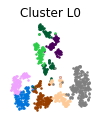

In [7]:
with loompy.connect(DA, 'r', validate=False) as ds_orig:

        attr = np.array([str(i) for i in ds_orig.ca.Clusters])
        embedding = ds_orig.ca.TSNE

        tmp,cluster0_cmap = mplot.factors(attr,embedding,\
                            title='Cluster L0',figsize=(1.5,1.3),\
                         s=25,with_legend=False,annotated=False,return_col=True)

tmp

In [8]:
ClusterL1 = dict({
    0:'SOX6 PART1, GFRA2',
    1:'SOX6 AGTR1',
    2:'SOX6 LPL',
    3:'doublets',
    4:'CALB1 CERKL',
    5:'GAD2 CALCRL',
    6:'GAD2 EBF2',
    7:'CALB1 PRLHR',
    8:'CALB1 CRYM, CALCR',
    9:'CALB1 NEUROD6, PPP1R17',
    10:'CALB1 PAX5',
    11:'CALB1 SEMA3D, GEM',
    12:'CALB1 NPW',
    13:'CALB1 GCGR',
    14:'CALB1 VIP'
})

In [ ]:
cluster_cmap

<Axes:>

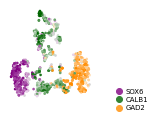

In [9]:
with loompy.connect(DA, 'r', validate=False) as ds:

    genes = ['SOX6','CALB1','GAD2']
    cmaps=['purple','darkgreen','darkorange']
    
    final_cmaps = scatterm_mod.scatterm(
        ds.ca.TSNE,
        figsize = (1.5,1.3),
        c=np.array([np.log2(ds[(ds.ra.Gene == g ).nonzero()[0], :].flatten() + 1) for g in genes]),
        cmaps=cmaps,
        bgval=0,
        labels=genes,
        s=7,
        legend=None,
    )
    plt.axis('off')

ax_size = [0.91,0,0.01,0.01]
scatterm_mod.draw_legend(final_cmaps,genes,ax_size=ax_size,ms=1,labelspacing=0.3)


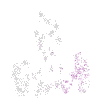

In [10]:
with loompy.connect(DA, 'r', validate=False) as ds:


    genes = ['TH','GAD2']
    c=[np.log2(ds[(ds.ra.Gene == g).nonzero()[0], :].flatten() + 1) for g in genes]
    colors_TH_GAD2,b00l_TH_GAD2,final_cmaps_enzyme =scatterm_mod.scatterm_prodonly(
        ds.ca.TSNE,
        figsize = (1.5,1.3),
        c=[np.log2(ds[(ds.ra.Gene == g).nonzero()[0], :].flatten() + 1) for g in genes],
        cmaps=["purple"],
        bgval=0,
        labels=genes,
        rasterized=True,
        s=1,
        nowhite=True,
        legend=True
    )
    

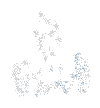

In [11]:
with loompy.connect(DA, 'r', validate=False) as ds:

    genes = ['SLC18A2','SLC32A1']
    c=[np.log2(ds[(ds.ra.Gene == g).nonzero()[0], :].flatten() + 1) for g in genes]
    colors_SLC,b00l_SLC,final_cmaps_SLC =scatterm_mod.scatterm_prodonly(
        ds.ca.TSNE,
        figsize = (1.5,1.3),
        c=[np.log2(ds[(ds.ra.Gene == g).nonzero()[0], :].flatten() + 1) for g in genes],
        cmaps=["steelblue"],
        bgval=0,
        labels=genes,
        rasterized=True,
        s=1,
        nowhite=True,
        reverse=True,
        legend=True
    )

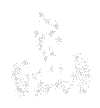

In [12]:
with loompy.connect(DA, 'r', validate=False) as ds:

    genes = ['SLC18A2','SLC32A1','TH','GAD2']
    c=[np.log2(ds[(ds.ra.Gene == g).nonzero()[0], :].flatten() + 1) for g in genes]
    colors_both,b00l_both,final_cmaps_both =scatterm_mod.scatterm_prodonly(
        ds.ca.TSNE,
        figsize=(1.5,1.3),
        c=[np.log2(ds[(ds.ra.Gene == g).nonzero()[0], :].flatten() + 1) for g in genes],
        cmaps=["darkorange"],
        bgval=0,
        labels=genes,
        rasterized=True,
        s=1,
        nowhite=True,
        legend=True
    )


<Axes:>

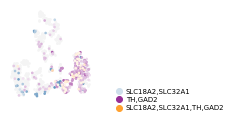

In [14]:
with loompy.connect(DA, 'r', validate=False) as ds:
    
    figsize =(1.5, 1.3)
    fig = plt.figure(None,figsize)  
    ax = fig.add_axes([0, 0, 0.8, 1])
    markersize = 7
    
    grey = np.concatenate([b00l_SLC,b00l_TH_GAD2])
    grey = np.isin(np.arange(ds.shape[1]),grey,invert=True)
    
    both = np.intersect1d(b00l_SLC,b00l_TH_GAD2)
    
    b00l = np.isin(b00l_SLC,both,invert=True)
    b00l_SLC_ = b00l_SLC[b00l]
    
    b00l = np.isin(b00l_TH_GAD2,both,invert=True)
    b00l_TH_GAD2_ = b00l_TH_GAD2[b00l]
    
    plt.scatter(ds.ca.TSNE[:,0][grey],ds.ca.TSNE[:,1][grey],color=viridis_grey,s=markersize,alpha=1,lw=0,rasterized=True)
    plt.scatter(ds.ca.TSNE[:,0][b00l_SLC_],ds.ca.TSNE[:,1][b00l_SLC_],c=colors_SLC[b00l_SLC_],s=markersize,lw=0,alpha=1,rasterized=True)
    plt.scatter(ds.ca.TSNE[:,0][b00l_TH_GAD2_],ds.ca.TSNE[:,1][b00l_TH_GAD2_],c=colors_TH_GAD2[b00l_TH_GAD2_],s=markersize,lw=0,alpha=1,rasterized=True)
    plt.scatter(ds.ca.TSNE[:,0][both],ds.ca.TSNE[:,1][both],c=colors_both[both],s=markersize,lw=0,alpha=1,rasterized=True)

    plt.axis('off')
    alpha=1


# fname = ofolder+f'fig/FIG//v2/rasterized/joint_SLC18A2_enzyme.svg'
# plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')

final_cmaps = np.concatenate([final_cmaps_SLC,final_cmaps_enzyme,final_cmaps_both])

ax_size = [0.91,0,0.01,0.01]
scatterm_mod.draw_legend(final_cmaps,['SLC18A2,SLC32A1','TH,GAD2','SLC18A2,SLC32A1,TH,GAD2'],\
                         ax_size=ax_size,ms=1,labelspacing=0.3)

<Axes:>

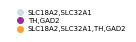

In [15]:

legend_all = np.concatenate([final_cmaps_SLC,final_cmaps_enzyme,final_cmaps_both])


ax_size = [0.91,0,0.01,0.01]
    
scatterm_mod.draw_legend(legend_all,['SLC18A2,SLC32A1','TH,GAD2','SLC18A2,SLC32A1,TH,GAD2'],ax_size=ax_size,ms=1,labelspacing=0.3)

# fname = ofolder+f'fig/FIG/v2/rasterized/joint_SLC18A2_enzyme_new_legend.svg'
# plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')



In [16]:
with loompy.connect(pool, 'r', validate=False) as ds:
    with loompy.connect(pool_agg, 'r', validate=False) as dsagg:
        clusterborders = np.cumsum(dsagg.ca.NCells)
        genes_ = np.array(['SOX10','MOG','LMX1A','NR4A2','PITX3','TH','DDC','SLC6A3','SLC18A2','SLC18A1',\
                       'SOX6','ALDH1A1','CALB2','CALB1','GAD2','GAD1','SLC32A1',\
                       'PART1','GFRA2','AGTR1','LPL',\
                          'CERKL','CALCRL','EBF2','ADCYAP1','PRLHR','CRYM','CALCR','NEUROD6','PPP1R17','SST','PAX5','SEMA3D','GEM',\
                       'NPW','CARTPT','PENK','GCGR','NPPC','VIP'\
                      ])
                   
        b00l =np.isin(ds.ra.Gene,genes_).nonzero()[0]
        gene_to_plot = ds.ra.Gene[b00l]
        ixs = own_utils.ixs_thatsort_a2b(gene_to_plot,genes_)
        data = np.log(ds[''][b00l, :] + 1)
        data = data[ixs,:]
        
        tissue = ds.ca.Tissue    
        tmp = [i.split(' - ')[0] for i in tissue]
        region = [i.split(' (')[0] for i in tmp]
   
        
        attr_plot = {
                'Cluster L1':ds.ca.Clusters,
                'Cluster L0':ds.ca.Clusters_0,
                'Region':region}
        

In [17]:
import matplotlib.colors

color_ROI = dict(
    zip(
        ["Cerebral cortex", "Hippocampus", "Cerebral nuclei", "Hypothalamus", "Thalamus", "Midbrain", "Pons", "Cerebellum", "Myelencephalon", "Spinal cord"],
        ['#4682f0', '#8eb7d1', '#89d8e0', '#f28e37', '#e7bc1f', '#43ad78', '#a7236e', '#ed5f8e', '#955ba5', '#eec2a4']))

cluster_cmap = dict({'0': np.array([0.9375    , 0.63671875, 0.99609375]),
 '1': np.array([0.        , 0.45703125, 0.859375  ]),
 '10': np.array([0.59765625, 0.24609375, 0.        ]),
 '11': np.array([0.296875, 0.      , 0.359375]),
 '12': np.array([0.        , 0.359375  , 0.19140625]),
 '13': np.array([0.16796875, 0.8046875 , 0.28125   ]),
 '14': np.array([0.99609375, 0.796875  , 0.59765625]),
 '2': np.array([0.5, 0.5, 0.5]),
 '3': np.array([0.578125  , 0.99609375, 0.70703125]),
 '4': np.array([0.55859375, 0.484375  , 0.        ]),
 '5': np.array([0.61328125, 0.796875  , 0.        ]),
 '6': np.array([0.7578125, 0.       , 0.53125  ]),
 '7': np.array([0.        , 0.19921875, 0.5       ]),
 '8': np.array([0.99609375, 0.640625  , 0.01953125]),
 '9': np.array([0.99609375, 0.65625   , 0.73046875])})

cluster0_cmap = dict({'0': np.array([0.9375    , 0.63671875, 0.99609375]),
 '1': np.array([0.        , 0.45703125, 0.859375  ]),
 '2': np.array([0.59765625, 0.24609375, 0.        ]),
 '3': np.array([0.296875, 0.      , 0.359375]),
 '4': np.array([0.        , 0.359375  , 0.19140625]),
 '5': np.array([0.16796875, 0.8046875 , 0.28125   ]),
 '6': np.array([0.99609375, 0.796875  , 0.59765625]),
 '7': np.array([0.5, 0.5, 0.5])})

cluster_cmap_ = dict()
for k,v in cluster_cmap.items():
    cluster_cmap_[int(k)] =v

cluster0_cmap_ = dict()
for k,v in cluster0_cmap.items():
    cluster0_cmap_[int(k)] =v
    
color_ROI_= dict()
for k,v in color_ROI.items():
    color_ROI_[k] = matplotlib.colors.to_rgb(v)
    

246


/home/kawai/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  app.launch_new_instance()


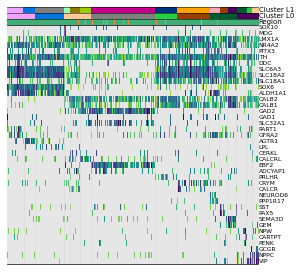

In [19]:
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize

to_plot_pd = data
strip_height=6
strip_height_attr = 1
blank = 1
total_height =  to_plot_pd.shape[0]*strip_height+len(attr_plot)*strip_height_attr+len(attr_plot)*blank
print(total_height)
fig = plt.figure(figsize = (4.5,5.5))#(figsize=(5,total_height/6.5))
grid = (50,1)#(total_height,1)
offset=0
grey = (239/256, 239/256, 240/256,1)
current_cmap = plt.cm.get_cmap()

current_cmap.set_bad(color='grey')

color_range = np.percentile(to_plot_pd, 99.9, axis=1)
data_scaled = to_plot_pd / color_range[None].T

# cattr_dict = [cluster0_cmap_,cluster_cmap_,color_ROI_]
cattr_dict = [cluster_cmap_,cluster0_cmap_,color_ROI_]

for i,k in enumerate(attr_plot):
   
    vals = attr_plot[k]
    d = np.array([cattr_dict[i][v] for v in vals])
    ax = plt.subplot2grid(grid, (offset, 0), rowspan=strip_height_attr)
    
    plt.imshow(np.expand_dims(d, axis=0), aspect='auto', interpolation='nearest',rasterized=True)
    plt.text(1.002,1, k, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=7, color="black")

    ax.set_yticks([])
    ax.set_xticks([])
    
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)

    
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
#     if i ==0:
#         offset+=strip_height_attr
#     else:
#         offset += strip_height_attr+blank
    offset += strip_height_attr
#     plt.axis("off")
ax = plt.subplot2grid(grid, (offset, 0), rowspan=to_plot_pd.shape[0])
normalize = Normalize(vmin = 0, vmax = 1)

bg = np.zeros_like(to_plot_pd) + 0.9
x_norm = np.ma.masked_where(to_plot_pd== 0, data_scaled)

# data = np.log2(data + 1)
#     x_norm = cg.div0(data, np.percentile(data.T, 99.9, axis=1)).T
#     bg = np.zeros_like(data.T) + 0.9
#     x_norm = np.ma.masked_where(data.T == 0, x_norm)
    
ax.imshow(bg, vmin=0, vmax=1, cmap=plt.cm.gray ,aspect="auto", alpha=1,
          interpolation="nearest", resample=False,rasterized=True)
ax.imshow(x_norm, cmap="viridis_r",vmin=0, vmax=1,interpolation="nearest", aspect="auto", alpha=1,resample=False,rasterized=True)
               
# ax.imshow(data_scaled, aspect='auto', norm = normalize,cmap=newcmp, vmin=0,vmax=1, interpolation='nearest',rasterized=True)
from matplotlib.cm import ScalarMappable

sm = ScalarMappable(norm = normalize,cmap="viridis_r")

tops = np.vstack((clusterborders - 0.5, np.zeros(clusterborders.shape[0]) - 0.5)).T
bottoms = np.vstack((clusterborders - 0.5, np.zeros(clusterborders.shape[0]) + data.shape[0] - 0.5)).T
lc = LineCollection(zip(tops, bottoms), linewidths=0.8, color='lightgrey', alpha=0.5)
ax.add_collection(lc)


n_genes = to_plot_pd.shape[0]
for ix, gene in enumerate(genes_):
    plt.text(1.001, 0.999 - ix / n_genes, gene, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=6, color="black")

#     ax.set_frame_on(False)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

ax.spines['top'].set_linewidth(0.7)
ax.spines['bottom'].set_linewidth(0.7)

# ax.grid(False)
plt.subplots_adjust(hspace=0)





# plt.savefig(os.path.join(ofolder,'fig/FIG/v2/rasterized/topgenes_peptides_newdim.svg'),format="svg", dpi=300, bbox_inches='tight',transparent=transparency)




In [27]:
colorbar =  dict({'sm':sm,
                  'vmin':0,
                  'vmax':1}) 
scatterm_mod.draw_colorbar(colorbar,
                           ax_size=[0,0,0.01,0.1],
            cbar_fraction = 1,
            cbar_aspect = 10,
            cbar_shrink = 1)
# plt.savefig(os.path.join(ofolder,'fig/FIG/v2/rasterized/topgenes_peptides_newdim_legend.svg'),format="svg", dpi=100, bbox_inches='tight',transparent=transparency)



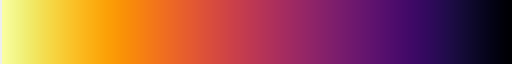

In [28]:

viridis = plt.cm.get_cmap('inferno_r', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = (239/256, 239/256, 240/256,1)
newcolors[:1, :] = grey
newcmp = mcolors.ListedColormap(newcolors)
newcmp

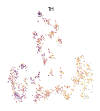

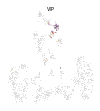

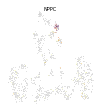

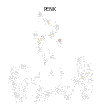

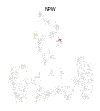

In [29]:
with loompy.connect(DA, 'r', validate=False) as ds:
    
    xy = ds.ca.TSNE
    genes_list =['TH','VIP','NPPC','PENK','NPW']
    for g in genes_list:
        genes = g
        c=np.log2(ds[''][(ds.ra.Gene == g).nonzero()[0],:].flatten() + 1)
        sm = scatterm_mod.scattern(
            figsize=(1.5,1.3),
            xy = xy,
            c=c,
            bgval=0,
            rasterized=True,
            s=0.5,

        )
        plt.title(genes,fontsize=5,y=0.93)
        plt.margins(0.01, 0.01)
        plt.axis('off')


## compare with kamath

In [30]:
cluster_cmap = dict({'0': np.array([0.9375    , 0.63671875, 0.99609375]),
 '1': np.array([0.        , 0.45703125, 0.859375  ]),
 '10': np.array([0.59765625, 0.24609375, 0.        ]),
 '11': np.array([0.296875, 0.      , 0.359375]),
 '12': np.array([0.        , 0.359375  , 0.19140625]),
 '13': np.array([0.16796875, 0.8046875 , 0.28125   ]),
 '14': np.array([0.99609375, 0.796875  , 0.59765625]),
 '2': np.array([0.5, 0.5, 0.5]),
 '3': np.array([0.578125  , 0.99609375, 0.70703125]),
 '4': np.array([0.55859375, 0.484375  , 0.        ]),
 '5': np.array([0.61328125, 0.796875  , 0.        ]),
 '6': np.array([0.7578125, 0.       , 0.53125  ]),
 '7': np.array([0.        , 0.19921875, 0.5       ]),
 '8': np.array([0.99609375, 0.640625  , 0.01953125]),
 '9': np.array([0.99609375, 0.65625   , 0.73046875])})

In [32]:
attr =np.arange(20)

celltype_color = mplot.colorize(attr)

color_kamath = dict()
color_matchorder = dict({'SOX6_GFRA2':'0', #0
         'SOX6_AGTR1':'1',#1
         'SOX6_DDT':'na',#
         'SOX6_PART1':'na',#
         'CALB1_RBP4':'na',#
         'CALB1_CRYM_CCDC68':'na',#
         'CALB1_TRHR':'7',
         'CALB1_CALCR':'8',#8
         'CALB1_PPP1R17':'9',#9
         'CALB1_GEM':'11'})
counter=0
for i,kv in enumerate(color_matchorder.items()):
    k,v = kv[0],kv[1]
    if v is 'na':
        col = celltype_color[15::,:][counter]
        color_kamath[k] = col
        counter+=1
    else:
        color_kamath[k] = cluster_cmap[v]
 
order_clu = ['0','1','2','3','4','5','6','8','9','11']


In [33]:
color_kamath = dict({'SOX6_GFRA2': np.array([0.9375    , 0.63671875, 0.99609375]),
 'SOX6_AGTR1': np.array([0.        , 0.45703125, 0.859375  ]),
 'SOX6_DDT': np.array([0.2578125, 0.3984375, 0.       ]),
 'SOX6_PART1': np.array([0.99609375, 0.        , 0.0625    ]),
 'CALB1_RBP4': np.array([0.3671875 , 0.94140625, 0.9453125 ]),
 'CALB1_CRYM_CCDC68': np.array([0.        , 0.59765625, 0.55859375]),
 'CALB1_TRHR': np.array([0.        , 0.19921875, 0.5       ]),
 'CALB1_CALCR': np.array([0.99609375, 0.640625  , 0.01953125]),
 'CALB1_PPP1R17': np.array([0.99609375, 0.65625   , 0.73046875]),
 'CALB1_GEM': np.array([0.296875, 0.      , 0.359375])})

In [34]:
sys.path.append(r'/data/proj/EA_KWL/rmd/from_git/off_grid_cytograph/')
from species.species import Species
from enrichment.feature_selection_by_variance import FeatureSelectionByVariance 
from preprocessing.normalizer import Normalizer
dir_ = '/data/proj/EA_KWL/data/Kamath1/loom_files/'

kamath_dactrl = '/data/proj/EA_KWL/data/Kamath1/data/DA_controlDA.loom'

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
 

In [458]:
with loompy.connect(kamath_dactrl,'r') as ds:
    
    le.fit(np.unique(ds.ca['Cell_Type']))
    labels = le.transform(ds.ca['Cell_Type']).astype('int')
    
    b00l = ds.ra.Selected==1

    X = ds[b00l.nonzero()[0],:].T
    y = labels
    
    sss = StratifiedShuffleSplit(n_splits=1,random_state=0)
    train_index_ = []
    test_index_ = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        print(y_train,y_test)
        train_index_.append(train_index)
        test_index_.append(test_index)
        
        
    RF_train_b00l = np.zeros(ds.shape[1])
    RF_train_b00l[train_index_[0]]=1
    
    ds.ca.RF_train_b00l = RF_train_b00l

[8 9 6 ... 9 6 8] [8 9 0 ... 6 6 7]


In [36]:
def df_compare(trainset,testset):
    
    relative_size_ref = np.sum(trainset,axis=0)
    target_size = np.median(relative_size_ref)

    norm_factor = div0(target_size,relative_size_ref)
    train_norm  = trainset*norm_factor
    train_norm_log = np.log(train_norm + 1)

#     relative_size_ref = np.sum(trainset, axis=0)
#     target_size = np.median(relative_size_ref)

    relative_size = np.sum(testset,axis=0)

    norm_factor = div0(target_size,relative_size)
    df_test  = testset*norm_factor

    df_test_log = np.log(df_test + 1)
    
    normalizer=0.9*train_norm_log.max(1)[:, None]
    
    return train_norm_log, df_test_log, normalizer

def div0(a: np.ndarray, b: np.ndarray) -> np.ndarray:
    """ ignore / 0, div0( [-1, 0, 1], 0 ) -> [0, 0, 0] """
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.true_divide(a, b)
        c[~np.isfinite(c)] = 0  # -inf inf NaN
    return c

## random forest

In [37]:

def inter_gene(a,b,return_one_indices_a=True):
    
    """
    try to match b to a!!
    """
    b_ = np.vstack([b,b]).T
    a_ = np.vstack([a,a]).T
    
    _,iloc_a,iloc_b = np.intersect1d(a_[:,0],b_[:,0],return_indices=True)

    gene_inter = a_[iloc_a,:] # matching genes between a and b
    stack = np.vstack((gene_inter,a_[~np.in1d(a_[:,0],gene_inter[:,0])]*[1,0])) #combine matching genes and missing one
    iloc = own_utils.ixs_thatsort_a2b(stack[:,0],a_[:,0]) # sort compiled genes to a 
    
    b_inter_gene = stack[iloc,:][:,1]
    match_b = np.where(b_inter_gene!='')[0]
    iloc_b_ = own_utils.ixs_thatsort_a2b(gene_inter[:,0],b_inter_gene[match_b])
    
    b_inter_iloc = iloc_b[iloc_b_]

    
    if return_one_indices_a:
        indices = np.where(stack[iloc,:][:,1]!='')[0] # b match for a - a.iloc equivalent
        
        return b_inter_gene,indices,b_inter_iloc
    
    else:
        return b_inter_gene

In [38]:

with loompy.connect(kamath_dactrl,'r') as ds:
    b00l = ds.ra.Selected==1
# #     print(ds.ca.keys())
    
    le.fit(np.unique(ds.ca['Cell_Type']))
    labels = le.transform(ds.ca['Cell_Type']).astype('int')
    labels_dict = dict(zip(np.unique(ds.ca['Cell_Type']),le.transform(np.unique(ds.ca['Cell_Type']))))
    
    X = (ds[b00l.nonzero()[0],:][:,ds.ca.RF_train_b00l==1]).T
#     X = Binarizer(threshold=3).fit_transform(X)
    
    y = labels[ds.ca.RF_train_b00l==1]
    
   
    
    X_test = (ds[b00l.nonzero()[0],:][:,ds.ca.RF_train_b00l==0]).T
    
    train_norm_log, df_test_log, normalizer = df_compare(X.T,X_test.T)
    X_train_norm = (div0(train_norm_log,normalizer)).T
    X_test_norm = (div0(df_test_log,normalizer)).T
#     X_test = Binarizer(threshold=3).fit_transform(X_test)
    
    y_test = labels[ds.ca.RF_train_b00l==0]
    
    RF_train_best = RandomForestClassifier(class_weight='balanced', max_features=0.3,
                       min_samples_leaf=4, n_estimators=100, n_jobs=-1,
                       oob_score=True, random_state=0)
    
    RF_train_best.fit(X_train_norm,y)
    
    y_pred = RF_train_best.predict(X_test_norm)
    
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))


0.7912747672772913

In [39]:
from sklearn.metrics import classification_report

classification_report_dict = (classification_report(y_test, y_pred,\
                                                    target_names=list(labels_dict.keys()),output_dict=True)) #DA ctrl


In [40]:
precision =[]
recall =[]
f1=[]
Cell_type =[]
class_k =[]
for k,v in classification_report_dict.items():
#     print(v['precision'])
    if k in ['accuracy','macro avg','weighted avg']:
        continue
    else:
        class_k.append(k)
        Cell_type.append(k)
        precision.append(v['precision'])
        recall.append(v['recall'])
        f1.append(v['f1-score'])

class_melt = pd.DataFrame({'Precision':precision,
              'Recall': recall,
              'F1 score': f1,
                'Cell type':Cell_type})
class_melt = pd.melt(class_melt,id_vars='Cell type')

<Axes:>

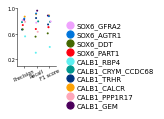

In [41]:
fig = plt.figure(None,(0.6,0.8))

ax1 = fig.add_axes([0,0,0.9,1])
ax1.set_ylim([0.1,1.0])
ax1.set_yticks([0.2,0.6,1.0])

dotsize=2

class_strip = sns.stripplot(x='variable',y='value',data=class_melt,jitter=0.15,hue='Cell type',\
                            palette =color_kamath,ax=ax1,size=dotsize,rasterized=True)
class_strip.get_legend().remove()
ax1.set_xticklabels(['Precision','Recall','F1 score'],rotation=25)


ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.tick_params(axis='both', labelsize=5)
ax1.spines['left'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.tick_params(axis='both', labelsize=5,length=2,width=0.5)

ax1.set_ylabel('')
ax1.set_xlabel('')
ax1.tick_params(axis='both', which='major', pad=0.01)



ax_size = [0.91,0,0,0]

scatterm_mod.draw_legend(list(color_kamath.values()),list(color_kamath.keys()),\
                         ax_size=ax_size,ms=1.2,labelspacing=0.3)

# name = 'classification_report'
# fname = ofolder+f'fig/FIG/v2/rasterized/{name}.svg'
# plt.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)

In [22]:
f1 = pd.read_csv(os.path.join(ofolder,'RF_params/metrics_train_mean_f1.csv'),header=None)
acc = pd.read_csv(os.path.join(ofolder,'RF_params/metrics_train_mean_accuracy.csv'),header=None)
trial= pd.read_csv(os.path.join(ofolder,'RF_params/trials_params.csv'),header=None)
acc = acc[2]
f1 = f1[2]

In [45]:
max_features_rf = trial[2].values
max_features_rf = [float(i.split(': ')[1]) for i in max_features_rf]

min_samples_leaf_rf = trial[3].values
min_samples_leaf_rf = [int(i.split(': ')[1].strip('}')) for i in min_samples_leaf_rf]

<Axes:>

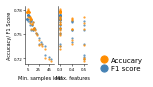

In [46]:
fig = plt.figure(None,(1.0,0.8))

ax1 = fig.add_axes([0,0,0.4,1])

dot_size = 5
# ax1 = fig.add_subplot(121)
ax1.scatter(min_samples_leaf_rf,f1.values,alpha=0.8,c='steelblue',s=dot_size,lw=0,rasterized=True)
ax1.scatter(min_samples_leaf_rf,acc.values,alpha=0.8,c='darkorange',s=dot_size,lw=0,rasterized=True)
ax1.set_xlim([0,55])
ax1.set_xticks([5,25,45])
ax1.set_yticks([0.72,0.75,0.78])
ax1.tick_params(axis='y', which='major', pad=1)

# ax2 = fig.add_subplot(122)

ax2 = fig.add_axes([0.45,0,0.4,1])

ax2.scatter(max_features_rf,f1.values,alpha=0.8,c='steelblue',s=dot_size,lw=0,rasterized=True)
ax2.scatter(max_features_rf,acc.values,alpha=0.8,c='darkorange',s=dot_size,lw=0,rasterized=True)

ax2.set_xlim([0.28,0.52])
ax2.set_xticks([0.3,0.4,0.5])
ax2.set_yticks([])
# ax2.spines['left'].set_visible(False)

ax_ =[ax1,ax2]
x_label = ['Min. samples leaf',' Max. features']
ax1.set_ylabel('Accucacy/ F1 Score',labelpad=1.5,fontsize=5)
ax1.tick_params(axis='both', labelsize=4,length=2,width=0.5)
ax2.tick_params(axis='both', labelsize=4,length=2,width=0.5)

for i,a in enumerate(ax_):
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)

    a.set_xlabel(x_label[i],fontsize=5)
    a.spines['left'].set_linewidth(0.5)
    a.spines['bottom'].set_linewidth(0.5)
    a.tick_params(axis='x', which='major', pad=0.9)

    
plt.subplots_adjust(wspace=0.1)

# fname = ofolder +'fig/FIG/v2/rasterized/Acc_f1.svg'
# plt.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)

ax_size = [0.91,0,0,0]

scatterm_mod.draw_legend(['darkorange','steelblue'],['Accucary','F1 score'],\
                        ax_size=ax_size,ms=1.2,labelspacing=0.3)

In [47]:
with loompy.connect(kamath_dactrl,'r') as ds:
    with loompy.connect(DA, 'r', validate=False) as ds_kim:

        b00l = ds.ra.Selected==1
        kamath_hvg_enrich = ds.ra.Gene[b00l]
        
        b = ds_kim.ra.Gene

        a = kamath_hvg_enrich

        tmp,one_iloc_a,one_iloc_b = own_utils.inter_gene(a,b)
        
        kim_mtx = np.zeros((len(kamath_hvg_enrich),ds_kim.shape[1]))
        kim_mtx[one_iloc_a,:] = ds_kim[:,:][one_iloc_b,:]
        kim_mtx = (kim_mtx.T)

    # #     print(ds.ca.keys())

        le.fit(np.unique(ds.ca['Cell_Type']))
        labels = le.transform(ds.ca['Cell_Type']).astype('int')
        labels_dict = dict(zip(np.unique(ds.ca['Cell_Type']),le.transform(np.unique(ds.ca['Cell_Type']))))

        X = (ds[b00l.nonzero()[0],:]).T
    #     X = Binarizer(threshold=3).fit_transform(X)
        train_norm_log, df_test_log, normalizer = df_compare(X.T,kim_mtx.T)
        X_train_norm = (own_utils.div0(train_norm_log,normalizer)).T
        X_test_norm = (own_utils.div0(df_test_log,normalizer)).T

        y = labels

        RF_train_full = RandomForestClassifier(class_weight='balanced', max_features=0.3,
                       min_samples_leaf=4, n_estimators=100, n_jobs=-1,
                       oob_score=True, random_state=0)

        RF_train_full.fit(X_train_norm,y)

predicted = RF_train_full.predict(X_test_norm)

In [48]:
predicted_proba = RF_train_full.predict_proba(X_test_norm)

In [49]:
inv_label_dict = {v: k for k, v in labels_dict.items()}


## end

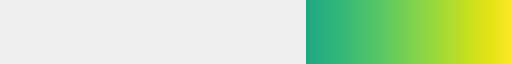

In [51]:
plt.cm.get_cmap('viridis')

viridis = plt.cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
grey = (239/256, 239/256, 240/256,1)
newcolors[:153, :] = grey
newcmp = mcolors.ListedColormap(newcolors)
newcmp

0 1
25


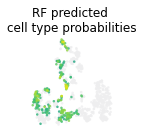

In [57]:


with loompy.connect(DA, 'r', validate=False) as ds:
   
    attr = np.max(predicted_proba,axis=1)
    less = np.sum(predicted_proba<0.6,axis=1)==10

    embedding = ds.ca.TSNE
    cticks = np.array([0,0.6,1])
#     plt.figure(None,(3,3))
#    
    umap = ds.ca.TSNE
    tmp,colbar = mplot.factors(attr,umap,title='RF predicted \ncell type probabilities',\
                                   figsize=(1.5,1.3),s=25,cmap =newcmp,vmin=0,vmax=1,\

                            return_cmap=True,with_legend=False
)
#     name = 'kamath_predict_grey_proba'
#     fname = ofolder+f'fig/FIG/v2/rasterized/{name}.svg'
#     tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)

    scatterm_mod.draw_colorbar(colbar,cbar_fraction = 0.99,cticks = cticks,
       ax_size=[0,0,0.01,0.1],
            cbar_aspect = 10,
            cbar_shrink = 1)
#     fname = ofolder+f'fig/FIG/v2/rasterized/{name}_legend.svg'
#     plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight',transparent =transparency)

    

tmp


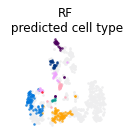

In [59]:
with loompy.connect(DA, 'r', validate=False) as ds:
   
    attr = np.array([inv_label_dict[i] for i in predicted])
    less = np.sum(predicted_proba<0.6,axis=1)==10

    embedding = ds.ca.TSNE
    
    title = 'RF\n predicted cell type'


    tmp = mplot.factors(np.array([str(i) for i in attr]),embedding,title=title,cells=np.invert(less),figsize=(1.5,1.3),\
                         s=25,cmap =color_kamath,with_legend=False,annotated=False)
    

# name = 'kamath_predict_grey'
# fname = ofolder+f'fig/FIG/v2/rasterized/{name}.svg'
# tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)

# ax_size = [0.35,1,0,0]
# scatterm_mod.draw_legend(list(color_kamath.values()),order,ax_size=ax_size,ms=4)
tmp

In [175]:
color_kamath

{'SOX6_GFRA2': array([0.9375    , 0.63671875, 0.99609375]),
 'SOX6_AGTR1': array([0.        , 0.45703125, 0.859375  ]),
 'SOX6_DDT': array([0.2578125, 0.3984375, 0.       ]),
 'SOX6_PART1': array([0.99609375, 0.        , 0.0625    ]),
 'CALB1_RBP4': array([0.3671875 , 0.94140625, 0.9453125 ]),
 'CALB1_CRYM_CCDC68': array([0.        , 0.59765625, 0.55859375]),
 'CALB1_TRHR': array([0.        , 0.19921875, 0.5       ]),
 'CALB1_CALCR': array([0.99609375, 0.640625  , 0.01953125]),
 'CALB1_PPP1R17': array([0.99609375, 0.65625   , 0.73046875]),
 'CALB1_GEM': array([0.296875, 0.      , 0.359375])}

<Axes:>

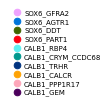

In [61]:

# ax_size = [0.91,0,0,0]

# scatterm_mod.draw_legend(list(color_kamath.values()),order,ax_size=ax_size,ms=2.5,labelspacing=0.3)
# fname = ofolder+f'fig/FIG/v2/{name}_legend.svg'
# plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')
fig = plt.figure(None,(1.5,1.3))
ax_size = [0.3,0.5,0,0]
scatterm_mod.draw_legend(list(color_kamath.values()),list(color_kamath.keys()),ax_size=ax_size,ms=1.1,labelspacing=0.3)
# name = 'kamath_predict_grey'
# fname = ofolder+f'fig/FIG/v2/rasterized/{name}_legend.svg'
# plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight',transparent=True)

## integration

In [62]:
import logging
import warnings

import community
import networkx as nx
import numpy as np
import scipy.sparse as sparse
from umap import UMAP
from sklearn.manifold import TSNE
from numba import NumbaPerformanceWarning, NumbaPendingDeprecationWarning
from scipy.sparse import SparseEfficiencyWarning
from pynndescent import NNDescent
from sknetwork.clustering import Louvain

import loompy
from cytograph.annotation import CellCycleAnnotator
from cytograph.clustering import UnpolishedLouvain, PolishedLouvain, PolishedSurprise
from cytograph.decomposition import HPF, PCA
from cytograph.embedding import art_of_tsne
from cytograph.enrichment import FeatureSelectionByEnrichment, FeatureSelectionByVariance
from cytograph.manifold import BalancedKNN
from cytograph.metrics import jensen_shannon_distance
from cytograph.manifold import PoissonPooling
from cytograph.preprocessing import Normalizer
from cytograph.species import Species


import numpy_groupies as npg


In [64]:
DA = '/proj/human_adult/20220222/harmony/by_cluster/data/harmony_A_A_EEEE.loom'


In [65]:
with loompy.connect(kamath_dactrl,'r') as ds:
    with loompy.connect(DA, 'r', validate=False) as ds_da:
        intergene,ds_idx,ds_da_idx =np.intersect1d(ds.ra.Gene,ds_da.ra.Gene,return_indices=True)
        
        ixs_sort = own_utils.ixs_thatsort_a2b(ds.ra.Gene[ds_idx],ds_da.ra.Gene[ds_da_idx])

In [66]:
with loompy.connect(kamath_dactrl,'r') as ds:
    print(ds.ra.Gene[ds_idx][ixs_sort])

['A1BG' 'A1BG-AS1' 'A1CF' ... 'ZZEF1' 'ZZZ3' 'hsa-mir-1253']


In [67]:
with loompy.connect(DA,'r') as ds:
    print(ds.ra.Gene[ds_da_idx])

['A1BG' 'A1BG-AS1' 'A1CF' ... 'ZZEF1' 'ZZZ3' 'hsa-mir-1253']


In [76]:
with loompy.connect(kamath_dactrl,'r') as ds:
    mtx = ds[''][:][ds_idx,:][ixs_sort,:].astype(np.float64)
    ra_items = dict()
    for k,v in ds.ra.items():
        ra_items[k] = v[ds_idx][ixs_sort]
        
    ca_items = dict()
    for k,v in ds.ca.items():
        ca_items[k] = v
    
    ca_items['Donor'] = ds.ca.donor_id
    ca_items['Dataset'] = np.repeat('Kamath',ds.shape[1])
    
    loompy.create('/proj/user/kawai/adultda/data/kamath.loom',mtx,ra_items,ca_items)

In [84]:
with loompy.connect(kim_DA,'r') as ds:
    mtx = ds[''][:][ds_da_idx,:]
    
    ra_items = dict()
    for k,v in ds.ra.items():
        ra_items[k] = v[ds_da_idx]
    ca_items = dict()
    for k,v in ds.ca.items():
        ca_items[k] = v
    
    ca_items['Dataset'] = np.repeat('Siletti',ds.shape[1])
    
    loompy.create('/proj/user/kawai/adultda/data/Siletti.loom',mtx,ra_items,ca_items)

In [250]:
with loompy.connect(kamath,'r') as ds:
    
    b00l = np.isin(ds.ca.CellID,np.ravel(random_))
    mtx = ds[''][:,b00l.nonzero()[0]].astype(np.float64)
    
    
    ra_items = dict()
    for k,v in ds.ra.items():
        ra_items[k] = v
    ca_items = dict()
    for k,v in ds.ca.items():
        ca_items[k] = v[b00l]
        
    
    
    loompy.create('/proj/user/kawai/adultda/data/kamath_random.loom',mtx,ra_items,ca_items)

In [327]:
with loompy.connect(pool,'r') as ds:
    
    b00l = ds.ca.Clusters!=3
    in_ = ds.ca.CellID[b00l]
    
with loompy.connect(kim_DA,'r') as ds:
    b00l = np.isin(ds.ca.CellID,in_)
    mtx = ds[''][:,b00l.nonzero()[0]].astype(np.float64)


    ra_items = dict()
    for k,v in ds.ra.items():
        ra_items[k] = v
    ca_items = dict()
    for k,v in ds.ca.items():
        ca_items[k] = v[b00l]

    
    
    loompy.create('/proj/user/kawai/adultda/data/DAsplit.loom',mtx,ra_items,ca_items)

In [329]:
loompy.combine([DAsplit,kamath_random],'/proj/user/kawai/adultda/data/combine_DAsplit_random.loom', key="Gene")

In [73]:
kamath = '/proj/user/kawai/adultda/data/kamath.loom'
DAsplit = '/proj/user/kawai/adultda/data/DAsplit.loom'
kamath_random = '/proj/user/kawai/adultda/data/kamath_random.loom'
combine_DAsplit_random = '/proj/user/kawai/adultda/data/combine_DAsplit_random.loom'
pool = '/proj/user/kawai/DA/data/Pool_0.loom'


In [74]:
from enrichment import feature_selection_by_variance
from species.species import Species


In [75]:
with loompy.connect(kamath) as ds:
    nnz = ds.map([np.count_nonzero], axis=0)[0]
    valid_genes = np.logical_and(nnz > 10, nnz < ds.shape[1] * 0.6)
    ds.ra.Valid = valid_genes.astype('int')
        
    tomask=["sex", "ery",'cellcycle','ieg','mt']
    
    mask = Species.detect(ds).mask\
                   (ds, tomask)

    select_kamath = FeatureSelectionByVariance(2000, mask=mask).fit(ds)


In [76]:
with loompy.connect(kamath,'r') as ds:
    
    cellid = ds.ca.CellID
    cell_types = ds.ca.Cell_Type
    uni_cell_type = np.unique(cell_types)
    
    random_ =[]
    for i,v in enumerate(uni_cell_type):
        b00l = cell_types==v
        random_.append(np.random.choice(cellid,100))

In [77]:
with loompy.connect(DAsplit) as ds:
    nnz = ds.map([np.count_nonzero], axis=0)[0]
    valid_genes = np.logical_and(nnz > 10, nnz < ds.shape[1] * 0.6)
    ds.ra.Valid = valid_genes.astype('int')
    
    tomask=["sex", "ery",'cellcycle','ieg','mt']
    
    mask = Species.detect(ds).mask\
                   (ds, tomask)

    select_siletti = FeatureSelectionByVariance(2000, mask=mask).fit(ds)

In [331]:
with loompy.connect(combine_DAsplit_random) as ds:
    
    k = 25
    metric = 'euclidean'
    graph = 'RNN'
    
    genes = np.all(np.vstack([select_kamath,select_siletti]),axis=0)
    print(np.sum(genes))
    normalizer = Normalizer(False)
    normalizer.fit(ds)
    n_components = 40
    pca = PCA(genes, max_n_components=n_components, layer='', test_significance=False, batch_keys=['Donor'])
    ds.ca.PCA = pca.fit_transform(ds, normalizer)
    
    transformed = ds.ca.PCA
    
    bnn = BalancedKNN(k=k, metric=metric, maxl=2 * k, sight_k=2 * k, n_jobs=-1)
    bnn.fit(transformed)
    knn = bnn.kneighbors_graph(mode='distance')
    knn.eliminate_zeros()
    mknn = knn.minimum(knn.transpose())
    # Convert distances to similarities
    max_d = knn.data.max()
    knn.data = (max_d - knn.data) / max_d
    mknn.data = (max_d - mknn.data) / max_d
    ds.col_graphs.KNN = knn
    ds.col_graphs.MKNN = mknn
    mknn = mknn.tocoo()
    mknn.setdiag(0)
    # Compute the effective resolution
    d = 1 - knn.data
    radius = np.percentile(d, 90)
    logging.info(f"  90th percentile radius: {radius:.02}")
    ds.attrs.radius = radius
    inside = mknn.data > 1 - radius
    rnn = sparse.coo_matrix((mknn.data[inside], (mknn.row[inside], mknn.col[inside])), shape=mknn.shape)
    ds.col_graphs.RNN = rnn
    
    ds.ca.TSNE = np.array(art_of_tsne(ds.ca.PCA, metric=metric)) 
    
    pl = UnpolishedLouvain(graph=graph, embedding="PCA")
    labels = pl.fit_predict(ds)
    ds.ca.Clusters_l = labels + min(labels)
  

1012


/home/kawai/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
	Completed 9 / 10 iteration(s).
	Completed 10 / 10 iteration(s).


In [78]:
pool_dict = {0:'SOX6 PART1, GFRA2',
            1: 'SOX6 AGTR1',
            2: 'SOX6 LPL',
            3: 'doublets',
            4: 'CALB1 CERKL',
            5: 'GAD2 CALCRL',
            6: 'GAD2 EBF2',
            7: 'CALB1 PRLHR',
            8: 'CALB1 CRYM, CALCR',
            9: 'CALB1 NEUROD6, PPP1R17',
            10: 'CALB1 PAX5',
            11: 'CALB1 SEMA3D, GEM',
            12: 'CALB1 NPW',
            13: 'CALB1 GCGR',
            14: 'CALB1 VIP'}

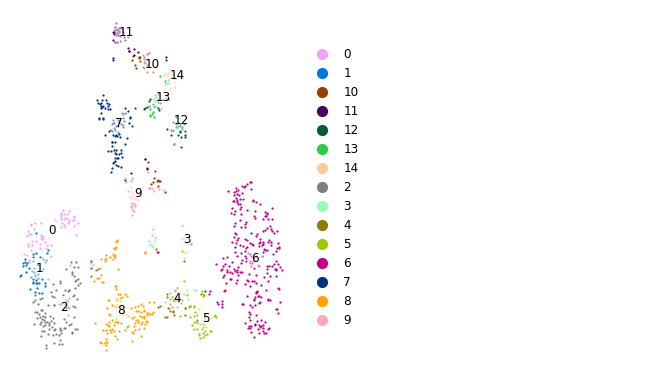

In [80]:
with loompy.connect(pool, 'r') as ds:
    attr_ = dict(zip(ds.ca.CellID,ds.ca.Clusters))
    
with loompy.connect(DA,'r') as ds:
        
    embed = ds.ca.TSNE
    attr =[]
    for i in ds.ca.CellID:
        if i in attr_.keys():
            attr.append(attr_[i])
        else:
            attr.append('')
#     attr = ds.ca.Clusters
    attr = np.array([str(i) for i in attr])
    embedding = ds.ca.TSNE

#     attr = attr =='CALB1_GEM'
    tmp = mplot.factors(attr,embedding,figsize=(5,5),\
                         s=20)
tmp

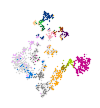

In [81]:
with loompy.connect(pool, 'r') as ds:
    attr = [pool_dict[i] for i in ds.ca.Clusters]
    attr_ = dict(zip(ds.ca.CellID,ds.ca.Clusters))
    
with loompy.connect(combine_DAsplit_random,'r') as ds:
        
    embed = ds.ca.TSNE
    attr =[]
    for i in ds.ca.CellID:
        if i in attr_.keys():
            attr.append(attr_[i])
        else:
            attr.append('')
    attr = np.array([str(i) for i in attr])
    embedding = ds.ca.TSNE
    cluster_cmap[''] = [0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0]
    tmp = mplot.factors(attr,embedding,figsize=(1.5,1.3),
                         s=7,with_legend=False,annotated=False,cmap=cluster_cmap)
    
    
# name = 'harmonized_DA'
# fname = ofolder+f'fig/FIG/v2/rasterized/{name}.svg'
# tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)

tmp

In [82]:
col_bar_ = dict()
for k,v in cluster_cmap.items():
    if k=='':
        continue
    key = pool_dict[int(k)]  
    if key =='doublets':
        continue
    col_bar_[key] = v


In [83]:
order = ['SOX6 PART1, GFRA2', 
'SOX6 AGTR1',  
'SOX6 LPL', 
'CALB1 CERKL',
'CALB1 PAX5', 
'CALB1 SEMA3D, GEM',
'CALB1 PRLHR', 
'CALB1 CRYM, CALCR', 
'CALB1 NEUROD6, PPP1R17',
'CALB1 NPW', 
'CALB1 GCGR', 
'CALB1 VIP',
'GAD2 CALCRL', 
'GAD2 EBF2']

ixs = own_utils.ixs_thatsort_a2b(list(col_bar_.keys()),order)

<Axes:>

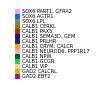

In [84]:
figsize =(1.5, 1.3)
fig = plt.figure(None,figsize)  

ax_size = [0.91,0,0.01,0.01]
scatterm_mod.draw_legend(np.array(list(col_bar_.values()))[ixs],np.array(list(col_bar_.keys()))[ixs],\
                         ax_size=ax_size,fontsize=5,
                         ms=0.8,labelspacing=0,marker='s')


# fname = ofolder+f'fig/FIG/v2/rasterized/{name}_legend.svg'
# plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')


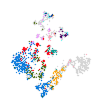

In [85]:
with loompy.connect(kamath_random, 'r') as ds:
    attr_ = dict(zip(ds.ca.CellID,ds.ca.Cell_Type))
    
with loompy.connect(combine_DAsplit_random,'r') as ds:
        
    embed = ds.ca.TSNE
    attr =[]
    for i in ds.ca.CellID:
        if i in attr_.keys():
            attr.append(attr_[i])
        else:
            attr.append('')
    attr = np.array([str(i) for i in attr])
    embedding = ds.ca.TSNE
    color_kamath[''] = [0.8274509803921568, 0.8274509803921568, 0.8274509803921568, 1.0]
    tmp = mplot.factors(attr,embedding,figsize=(1.5,1.3),\
                     s=7,with_legend=False,annotated=False,cmap = color_kamath)
    
    
# name = 'harmonized_kamath'
# fname = ofolder+f'fig/FIG/v2/rasterized/{name}.svg'
# tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)

tmp


/home/kawai/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


<Axes:>

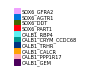

In [86]:
figsize =(1.5, 1.3)
fig = plt.figure(None,figsize)  

ax_size = [0.91,0,0.01,0.01]
scatterm_mod.draw_legend(np.array(list(color_kamath.values()))[:-1],np.array(list(color_kamath.keys()))[:-1],\
                         ax_size=ax_size,fontsize=5,
                         ms=0.9,labelspacing=0,marker='s')


# fname = ofolder+f'fig/FIG/v2/rasterized/{name}_legend.svg'
# plt.savefig(fname, format="svg", dpi=144, bbox_inches='tight')


In [99]:
with loompy.connect(combine_DAsplit_random,'r') as ds:
    with loompy.connect(kamath_random, 'r') as ds_kamath:
        attr_kamath = dict(zip(ds_kamath.ca.CellID,ds_kamath.ca.Cell_Type))
    with loompy.connect(pool,'r') as ds_siletti:
        attr = [pool_dict[i] for i in ds_siletti.ca.Clusters]
        attr_siletti = dict(zip(ds_siletti.ca.CellID,attr))
    
    attr = []
    for i,v in enumerate(ds.ca.CellID):
        if v in list(attr_kamath.keys()):
            attr.append(attr_kamath[v])
        else:
            attr.append(attr_siletti[v])
            
    uni_clu = np.unique(attr)
    uni_clu_le = le.fit(np.unique(attr)).transform(attr)
    
    print(np.unique(ds.ca.Clusters_l,return_counts=True),len(uni_clu))
    
        
    ctype_by_clu = dict()
    ctype_by_cell = np.zeros((len(np.unique(ds.ca.Clusters_l)),ds.shape[1]))

    for i,v in enumerate(np.unique(ds.ca.Clusters_l)):
        ctype_by_clu[v] = npg.aggregate_np(uni_clu_le, (ds.ca.Clusters_l==v).astype('int'), func="sum", fill_value=0) 
        ctype_by_cell[i,:] =  (ds.ca.Clusters_l==v).astype('int')
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), array([241, 120, 210,  61, 108, 157,  46, 106, 146, 110, 102,  95,  94,
        98, 240])) 24


In [100]:
order = ['SOX6 PART1, GFRA2', 
'SOX6 AGTR1',  
'SOX6 LPL', 
'CALB1 CERKL',
'CALB1 PAX5', 
'CALB1 SEMA3D, GEM',
'CALB1 PRLHR', 
'CALB1 CRYM, CALCR', 
'CALB1 NEUROD6, PPP1R17',
'CALB1 NPW', 
'CALB1 GCGR', 
'CALB1 VIP',
'GAD2 CALCRL', 
'GAD2 EBF2','SOX6_GFRA2',
'SOX6_AGTR1', 'SOX6_DDT', 
'SOX6_PART1', 'CALB1_RBP4', 
'CALB1_CRYM_CCDC68', 'CALB1_TRHR', 
'CALB1_CALCR', 'CALB1_PPP1R17', 'CALB1_GEM']

order = dict(zip(order,np.arange(len(order))))

In [101]:
attr_ordered = []
for i,v in enumerate(attr):
    attr_ordered.append((v,i,order[v]))

sorted_idx_ = sorted(attr_ordered, key=lambda attr_ordered: attr_ordered[2])
sorted_idx = []
counter_dict = dict()
for i,v in enumerate(sorted_idx_):
    sorted_idx.append(v[1])
ctype_by_cell_sorted = ctype_by_cell[:,sorted_idx]

In [102]:
uni_clu_col_dict = dict()
for i,v in enumerate(uni_clu):
    if v in list(col_bar_.keys()):
        uni_clu_col_dict[v] = col_bar_[v]
    else:
        uni_clu_col_dict[v] = color_kamath[v]
        
u,c = np.unique(np.array(attr)[sorted_idx],return_counts=True)
counter_dict = dict(zip(u,c))


In [103]:
# 17 uni color+15

attr_ = ctype_by_cell_sorted.shape[0]+21
celltype_color = mplot.colorize(np.arange(attr_))


harmonized_clu_col = celltype_color[np.where(np.sum(np.isin(celltype_color,list(uni_clu_col_dict.values())),axis=1)!=3)[0]]

In [97]:
ctype_by_cell_sorted.shape

(15, 1934)

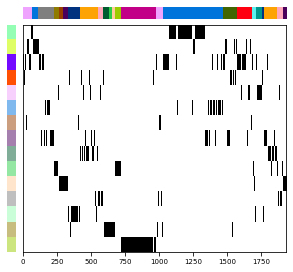

In [105]:
fig = plt.figure(figsize=(5, 4.5))
gs = fig.add_gridspec(2, 2,  width_ratios=(1, 30), height_ratios=(1, 20),
                     
                      wspace=0.05, hspace=0.05)

ncells = ctype_by_cell_sorted.shape[1]
nclusters = ctype_by_cell_sorted.shape[0]
# Create the Axes.
ax = fig.add_subplot(gs[1, 1])
ax_0 = fig.add_subplot(gs[0, 1], sharex=ax)
d = np.array([uni_clu_col_dict[i] for i in np.array(attr)[sorted_idx]]) 
ax_0.imshow(np.expand_dims(d, axis=0), aspect='auto', interpolation='nearest',origin="upper",\
           extent =(0,ncells,1,0), rasterized=True)
plt.axis("off")

ax_1 = fig.add_subplot(gs[1, 0],sharey=ax)
d = np.array(harmonized_clu_col)[::-1]
ax_1.imshow(np.expand_dims(d, axis=1), aspect='auto', interpolation='nearest',origin="upper",\
            extent =(0,1,-0.5,nclusters-0.5), rasterized=True)
plt.axis("off")

ax.imshow(ctype_by_cell_sorted, cmap=plt.cm.bone_r,vmin=0, vmax=1, origin="upper",\
           interpolation="nearest", aspect="auto", alpha=1,  resample=False)
plt.yticks([])
plt.xticks([])
name = 'harmonized_bin'
fname = ofolder+f'fig/FIG/v2/rasterized/{name}_big.svg'
plt.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)



In [93]:
key = [str(i) for i in np.arange(len(harmonized_clu_col))]
harmonized_clu_col_dict = dict(zip(key,harmonized_clu_col))

In [94]:
harmonized_clu_col_dict

{'0': array([0.578125  , 0.99609375, 0.70703125]),
 '1': array([0.875     , 0.99609375, 0.3984375 ]),
 '2': array([0.453125  , 0.0390625 , 0.99609375]),
 '3': array([0.99609375, 0.3125    , 0.01953125]),
 '4': array([0.96875   , 0.81835938, 0.99804688]),
 '5': array([0.5       , 0.72851562, 0.9296875 ]),
 '6': array([0.79882812, 0.62304688, 0.5       ]),
 '7': array([0.6484375, 0.5      , 0.6796875]),
 '8': array([0.5       , 0.6796875 , 0.59570312]),
 '9': array([0.58398438, 0.90234375, 0.640625  ]),
 '10': array([0.99804688, 0.8984375 , 0.79882812]),
 '11': array([0.75, 0.75, 0.75]),
 '12': array([0.7890625 , 0.99804688, 0.85351562]),
 '13': array([0.77929688, 0.7421875 , 0.5       ]),
 '14': array([0.80664062, 0.8984375 , 0.5       ])}

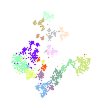

In [95]:
with loompy.connect(combine_DAsplit_random,'r') as ds:
        
    embedding = ds.ca.TSNE
    
    attr = np.array([str(i) for i in ds.ca.Clusters_l])
    
    tmp = mplot.factors(attr,embedding,figsize=(1.5,1.3),\
                         s=7,cmap = harmonized_clu_col_dict,with_legend=False,annotated=False)
    
    
# name = 'harmonized_clusters_l'
# fname = ofolder+f'fig/FIG/v2/rasterized/{name}.svg'
# tmp.savefig(fname, format="svg", dpi=300, bbox_inches='tight',transparent=True)

tmp
